## Background
<font size="3">

* Air pollution is widely belived as world's greatest environmental health threat.

*  Among the 30 most polluted cities in the world, 21 are located in India ,as reported by  <a href="https://www.iqair.com/in-en/world-most-polluted-cities">Swiss organisation, IQAir</a> (based on PM 2.5 concentration.)</font>

## Objective
<font size="3">


* In this analysis we will be analysing the pollution level of indian cities over the last 7 years

* The aim is to understand the problems well , by analysing the large amount of granular data relating to the concentration of air pollutants.

* Eventually , we would propose solutions, based on the insights from data.</font>

### About the dataset
<font size="3">

* The dataset consist of daily air quality informations (i.e. particulate matter PM2.5,PM10, sulfur dioxide, nitrogen dioxide, carbon monoxide, and ozone etc.) of 26 major cities across india , It is extracted from <a href="https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing/caaqm-comparison-data">cpcb.nic.in</a> .</font>

## Steps Taken

### Data Cleaning

<font size = "3"> 

I start by importing the dataset into Jupyter notebook. After checking its dimensions and composition, I check for mixed-type data, missing values, and duplicates.</font>

In [6]:
pwd = os.getcwd()

In [8]:
Imported_data = pd.read_csv( pwd + "/city_data.csv")
Imported_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0,0.02,0,NaN,NaN
1,Ahmedabad,2/1/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.5,3.77,NaN,NaN
2,Ahmedabad,3/1/2015,NaN,NaN,17.4,19.3,29.7,NaN,17.4,29.07,30.7,6.8,16.4,2.25,NaN,NaN
3,Ahmedabad,4/1/2015,NaN,NaN,1.7,18.48,17.97,NaN,1.7,18.59,36.08,4.43,10.14,1,NaN,NaN
4,Ahmedabad,5/1/2015,NaN,NaN,22.1,21.42,37.76,NaN,22.1,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size = "3"> We can see in the above dataframe that , the rows in the end has null values only. So first step is to get rid of these null values.</font>

In [10]:
Imported_data = Imported_data[Imported_data['City'].notna()]
Imported_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0,0.02,0,NaN,NaN
1,Ahmedabad,2/1/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.5,3.77,NaN,NaN
2,Ahmedabad,3/1/2015,NaN,NaN,17.4,19.3,29.7,NaN,17.4,29.07,30.7,6.8,16.4,2.25,NaN,NaN
3,Ahmedabad,4/1/2015,NaN,NaN,1.7,18.48,17.97,NaN,1.7,18.59,36.08,4.43,10.14,1,NaN,NaN
4,Ahmedabad,5/1/2015,NaN,NaN,22.1,21.42,37.76,NaN,22.1,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53263,Visakhapatnam,6/2/2023,130.17,369.34,118.16,63.8,130,8.13,1.5,24.67,13.77,12.09,44.85,4.61,NaN,NaN
53264,Visakhapatnam,7/2/2023,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN
53265,Visakhapatnam,8/2/2023,52.6,154.07,30.98,31.22,39.93,5.77,1.32,19.69,15,3.46,10.85,0.98,NaN,NaN
53266,Visakhapatnam,9/2/2023,57.74,147.25,29.47,31.34,40.67,5.84,1.07,26.98,13.99,3.65,21.75,0.8,NaN,NaN


<font size = "3">

#### Data prepration

* In order to prepare data for analysis . 'None' value is set to NULL . Also , It is crucial to convert all the pollutant concentration to numeric values , to avoid any errors while plotting these values later on.

* Copy of the imported dataset is created , to keep the imported dataset in original format .
 </font>

In [12]:
Imported_data = Imported_data.replace('None', np.NaN)

In [13]:
Imported_data['PM2.5'] = pd.to_numeric(Imported_data['PM2.5'])
Imported_data['PM10'] = pd.to_numeric(Imported_data['PM10'])
Imported_data['NO2'] = pd.to_numeric(Imported_data['NO2'])
Imported_data['CO'] = pd.to_numeric(Imported_data['CO'])
Imported_data['SO2'] = pd.to_numeric(Imported_data['SO2'])
Imported_data['O3'] = pd.to_numeric(Imported_data['O3'])
Imported_data['Benzene'] = pd.to_numeric(Imported_data['Benzene'])
Imported_data['Toluene'] = pd.to_numeric(Imported_data['Toluene'])
Imported_data['Xylene'] = pd.to_numeric(Imported_data['Xylene'])
Imported_data['NOx'] = pd.to_numeric(Imported_data['NOx'])
Imported_data['NO'] = pd.to_numeric(Imported_data['NO'])
Imported_data['NH3'] = pd.to_numeric(Imported_data['NH3'])


In [49]:
Imported_data['Date'] = pd.to_datetime(Imported_data['Date'])

In [50]:
print(f"The available data is between {Imported_data['Date'].min()} and {Imported_data['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2023-12-01 00:00:00


In [91]:
Imported_data_modified = Imported_data.copy()
Imported_data_modified

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53263,Visakhapatnam,2023-06-02,130.17,369.34,118.16,63.80,130.00,8.13,1.50,24.67,13.77,12.09,44.85,4.61,NaN,NaN
53264,Visakhapatnam,2023-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53265,Visakhapatnam,2023-08-02,52.60,154.07,30.98,31.22,39.93,5.77,1.32,19.69,15.00,3.46,10.85,0.98,NaN,NaN
53266,Visakhapatnam,2023-09-02,57.74,147.25,29.47,31.34,40.67,5.84,1.07,26.98,13.99,3.65,21.75,0.80,NaN,NaN


<font size = "3">

#### Handling Missing infromation
To visually understand , the proporation of rows with missing information , The missingno library can be used. </font>

In [18]:
Imported_data_modified.drop(columns= ["AQI" , "AQI_Bucket"] , inplace= True)

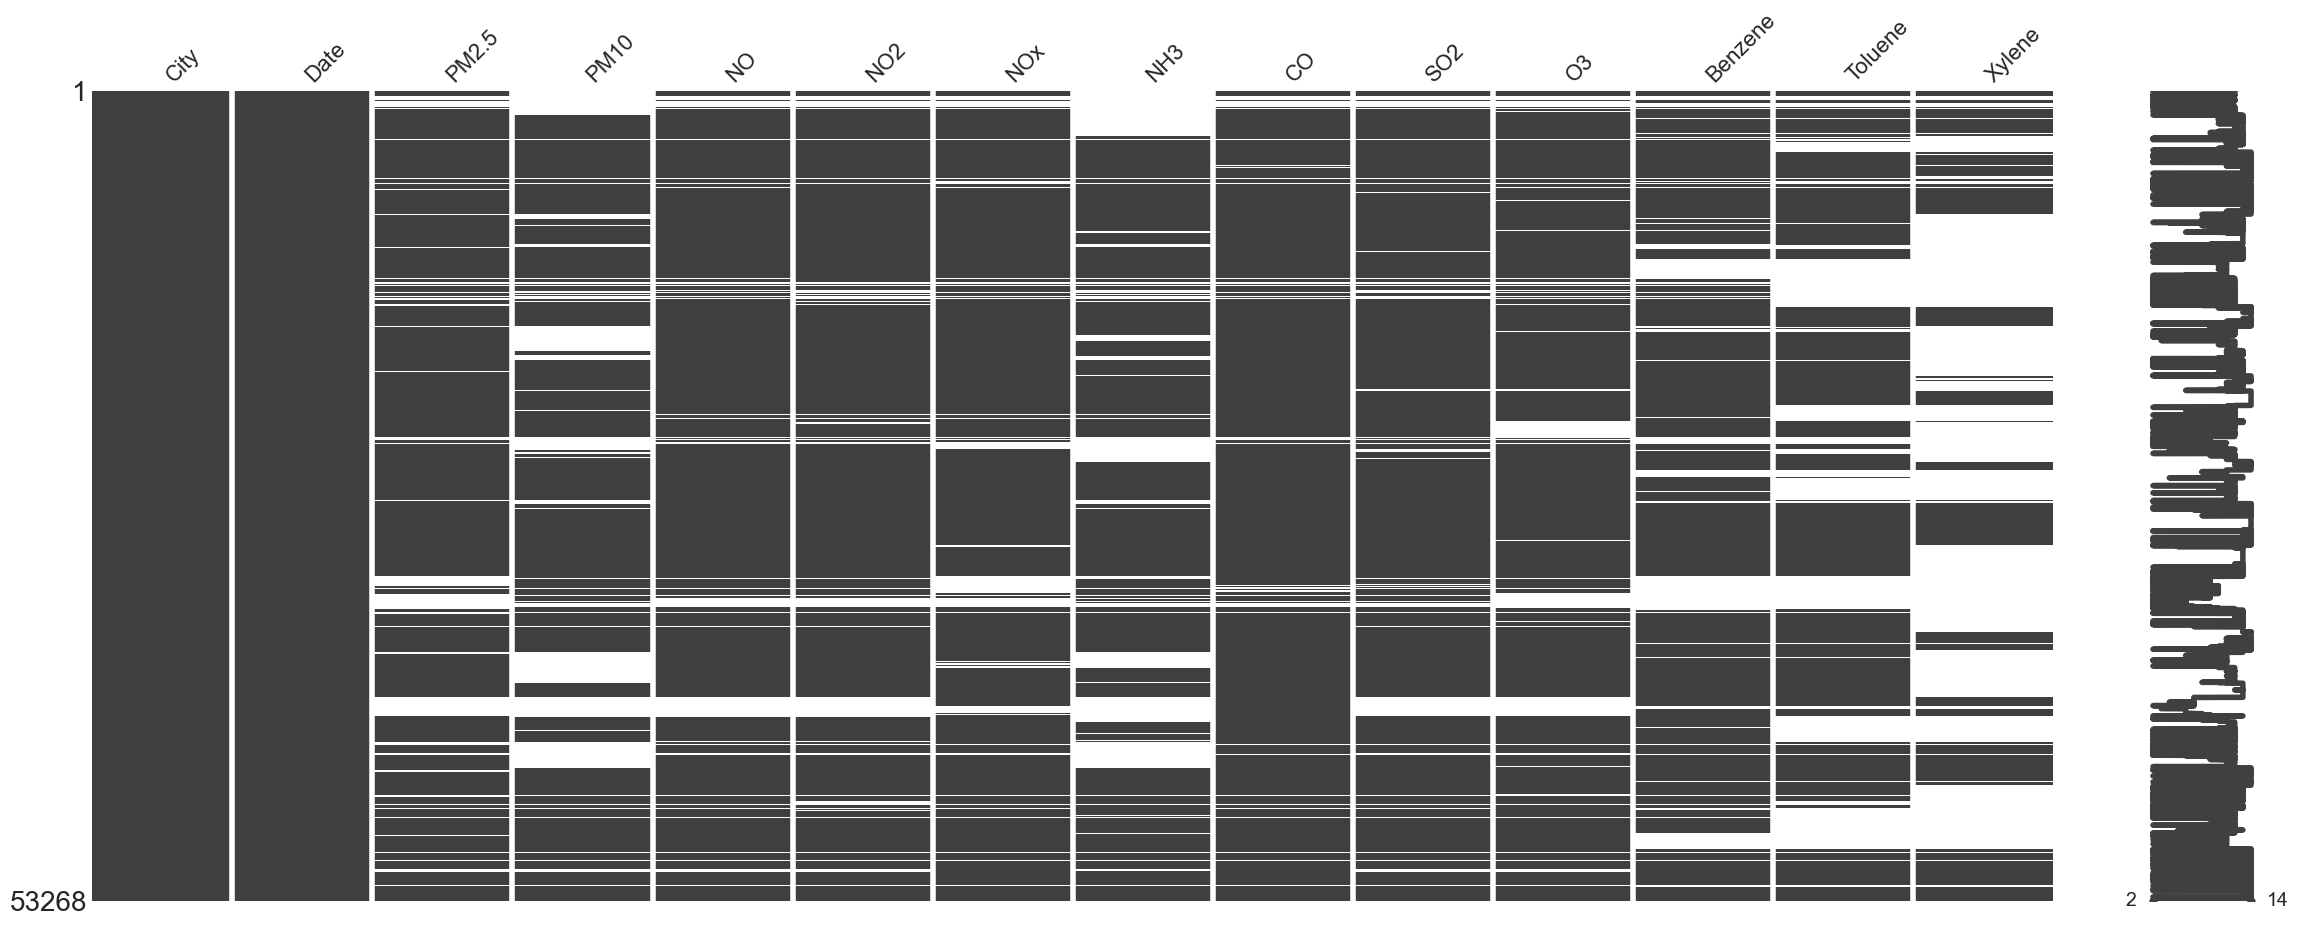

In [19]:
plt.style.use('seaborn-white')
msno.matrix(Imported_data_modified, );

<font size = "3"> 

#### Points to note:

* We can clearly see that Xylene information is largely missing .

* Missing information indicates the installed sensor's inability to measure pollutant's concentration.

In order to dig a little deeper , We can use heatmap for understanding the quantity of missing information , for each of the given pollutant.
Heatmap is created by summing up the number of null values and converting them into percentages. 
</font>

In [21]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val,mis_val_percent] , axis = 1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values' , 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0 ].sort_values(
        '% of Total Values' , ascending = False).round(1)

    print('Your selected dataframe has' + str(df.shape[1]) + 'columns.\n' 
    'There are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values.')

    return mis_val_table_ren_columns

missing_values = missing_values_table(Imported_data_modified)
missing_values.style.background_gradient(cmap = 'YlOrBr')

Your selected dataframe has14columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Xylene,33578,63.000000
Toluene,17023,32.000000
NH3,13809,25.900000
PM10,13056,24.500000
Benzene,9112,17.100000
O3,6798,12.800000
PM2.5,6762,12.700000
NOx,5781,10.900000
NO2,5677,10.700000
NO,5307,10.000000


<font size = "3"> As expected Xylene's information is laragely missing. The major pollutants like PM2.5 and PM10 concentration is within permissible limit.

Now , we can proceed further to analyze the dataset. </font>

### Correlation in the data

<font size = "3">

In correlation analysis, I use pandas to create a correlation matrix for all the numerical variables in the dataset. This will indicate the level of interdependence between the variables.

The volatile organic compounds Benzene , Toluene and Xylene are grouped together and represented as 'BTX'.
</font>

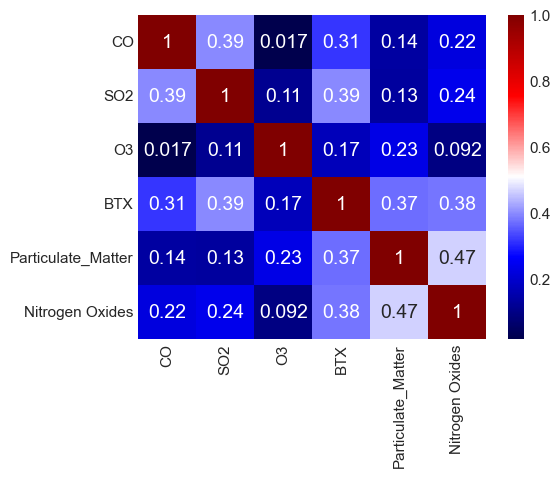

In [23]:
Imported_data_modified['BTX'] = Imported_data_modified['Benzene']+Imported_data_modified['Toluene']+Imported_data_modified['Xylene']
Imported_data_modified['Particulate_Matter'] = Imported_data_modified['PM2.5']+Imported_data_modified['PM10']
Imported_data_modified['Nitrogen Oxides'] = Imported_data_modified['NO']+Imported_data_modified['NO2']+Imported_data_modified['NOx']
Imported_data_modified.drop(['Benzene','Toluene','Xylene','PM2.5','PM10','NO','NO2','NOx'],axis=1,inplace=True)

plt.figure(figsize=(5,4))
sns.heatmap(Imported_data_modified.corr(),cmap='seismic',annot=True);

<font size = "3">The heatmap shows that there are only moderate relationships (like - BTX with other pollutants , Particulate matter with Nitrogen Oxides). It is important to note that- There is no strong relationships (i.e cofficent above 0.75).</font>

<font size = "3">

# Exploratory Data analysis

 I choose to use visual tools, charts, and graphs, to do the analysis.
<br>
<br>
We will be analysing the data by plotting it over the entire 7 year duration .

* It would help us to identify trends , In the pollutants concentration.

* It is imperative to test the **Hypothesis** that - *"Air pollution is associated with the type of climate and specificity of particular months."*

Let's now analyse  the data to see what patterns and insights we can uncover from it.
</font>



In [39]:
pollutants = ['PM2.5' , 'PM10' , 'NO2' , 'CO' , 'SO2' , 'O3']

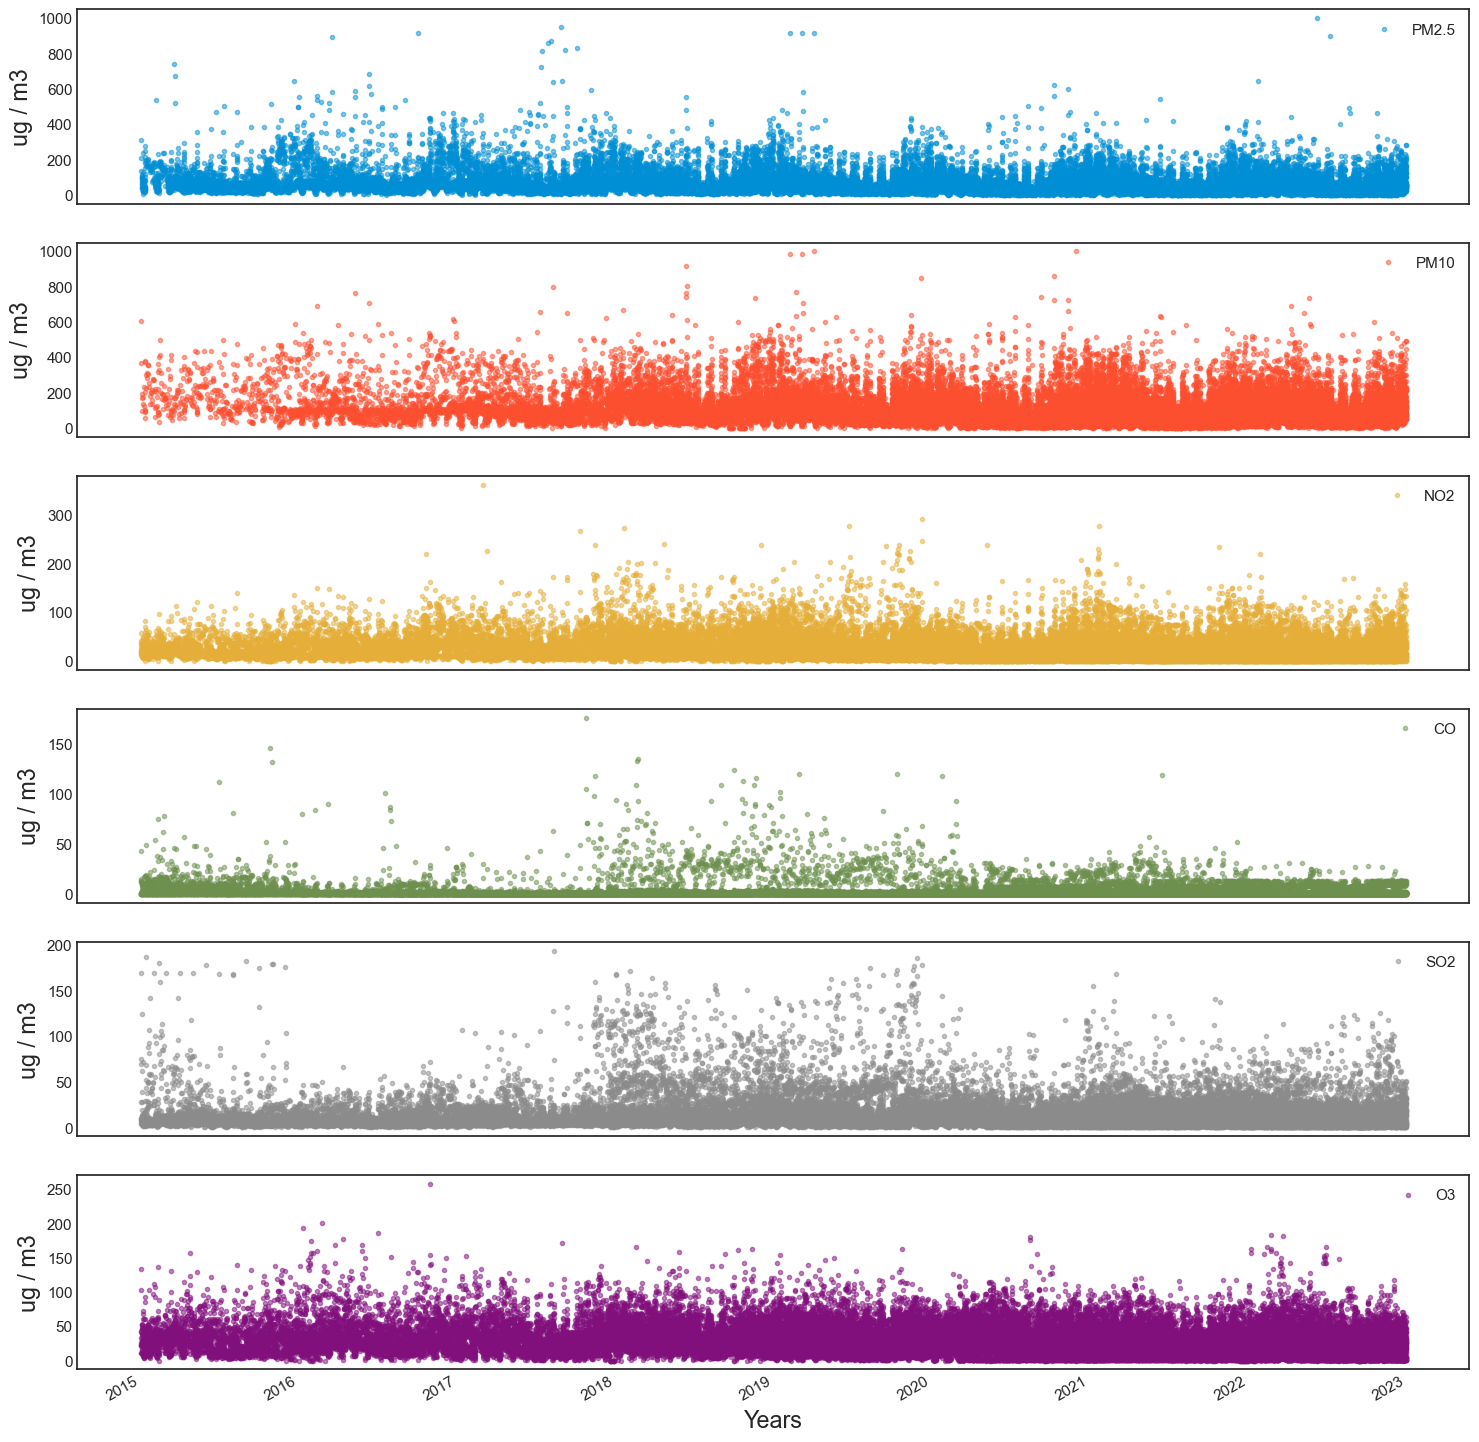

In [40]:
filtered_city_day = Imported_data_modified[Imported_data_modified['Date'] <= '2023-01-01']
filtered_city_day.set_index('Date' , inplace = True)
axes = filtered_city_day[pollutants].plot(marker = '.' , alpha = 0.5 , linestyle = 'None' , figsize = (16,20) , subplots = True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

<font size = "3">

#### Points to Note

* Pollutants like - PM2.5 , PM10 and NO2 show a clear seasonal effect, with pollution being higher in winter months as compared to the summer ones.
* Increasing trend (over the 7 year period) in pollutant's concentration can be clearly seen.It paints a grim picture of pollution in india.
* ***Hypothesis***  *"Air pollution is associated with the type of climate and specificity of particular months."* is True.

</font>

<font size = "3"> 

To dig a little deeper, i created subplots to analyze the distribution of pollutants over 5 year time period. To create the subplots I used the .subplot[] function in python.

* It would help us to see the seasonal effect in more clearly.

* It is imperative to test ***Hypothesis*** that-  *" Covid-19 pandemic lockdown (started in March 25 2020) had no effect on air pollution" .*

</font>

In [82]:
Imported_data_modified['NH3'] = pd.to_numeric(Imported_data_modified['NH3'])

In [109]:
corr_with_AQI = Imported_data_modified.corr().PM10.sort_values(ascending = False)

In [88]:
metrices = corr_with_AQI[corr_with_AQI>0.01].index

In [62]:
Imported_data_modified['Year_Month'] = Imported_data_modified.Date.apply(lambda x : x.strftime('%Y-%m'))

In [74]:
Imported_data_modified = Imported_data_modified[Imported_data_modified['Year_Month'] <= '2023-01-01']
Imported_data_modified = Imported_data_modified[Imported_data_modified['Year_Month'] >= '2017-10-01']


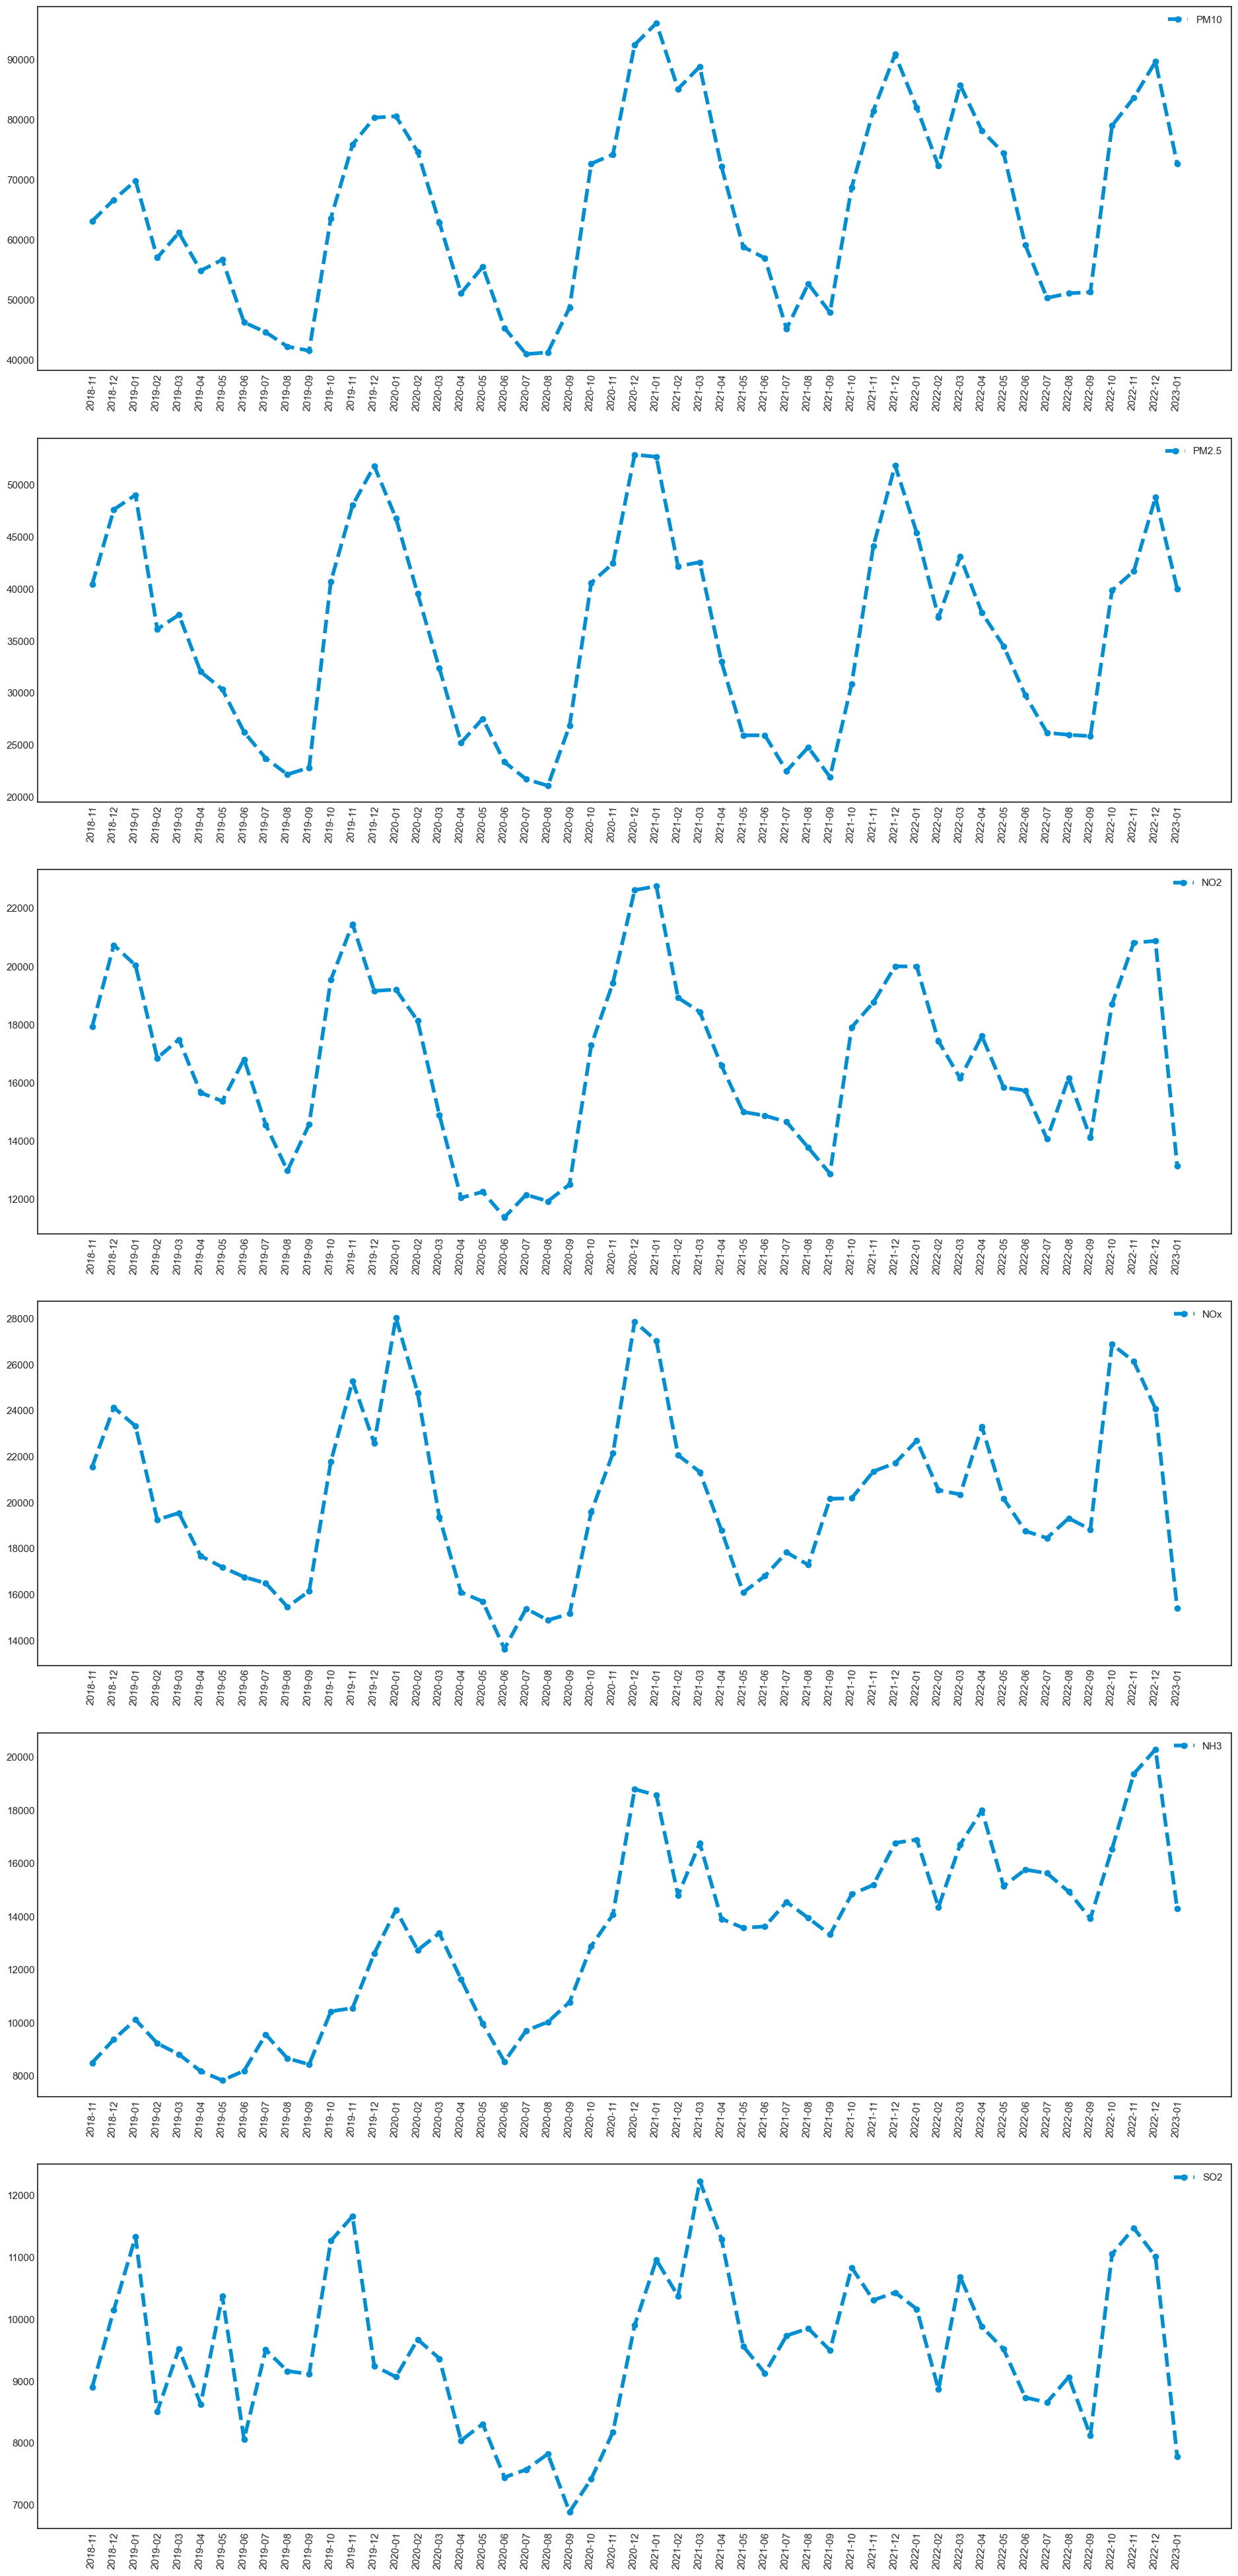

In [89]:
df = Imported_data_modified.groupby(['Year_Month']).sum().reset_index()

sns.set_style('ticks')
fig, ax_ = plt.subplots(len(metrices), 1, figsize=(20,40))


fig.tight_layout(pad=4)
for i, col in enumerate(metrices,start = 0):
    
    x = df['Year_Month']
    y = df[col]
    ax_[i].plot_date(x ,y ,label=col, linestyle="--")
    ax_[i].set_xticklabels(df['Year_Month'], rotation=85);
    ax_[i].legend();

    

<font size = "3"> The trend is clearly visible , The concentraion of pollutants in summer months (i.e April to August) is lowest . While concentration is highest in the winter months (i.e November to February).

#### Possible reasons for this phenomenon :

* Cold air is denser and moves slower than warm air after trapping pollutants.
* Anthropogenic activities like - fireplaces and wood burners release pollutants in atmosphere, during winter season.

Also , there is a **notable dip after 25 March 2020 lockdown** for all pollutants.  so the hypothesis that *" Covid-19 pandemic lockdown (started in March 25 2020) had no effect on air pollution" .* is False. The decrease in Particulate matter pollution and gaseous pollutants (CO and NO2) clearly reflects the impact of ceased industrial and vehicular activities during lockdown.

</font>

<font size = "3"> 

# Pollution in cities :


To analyze the pollutantion levels in the cities. Let's start by listing down all the 26 cities present in this dataset. To identify any duplicates , due to improper naming.
 </font>

In [92]:
Imported_data_modified['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

<font size = "3"> 

* In order to analyze the distribution of pollutants between the cities.
Proporation of pollutants can be plotted side by side using the treemap.</font>

In [93]:
import plotly.express as px

df = Imported_data_modified.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollutants in each')
fig.show()

<font size = "3">

North indian like cities - ***Delhi , Gurugram .*** tops this visualization.


#### Possible reasons for this phenomenon :

* Northern part of india and experience very low temperature during winter season.
* In northern india , Due to <a href = "https://www.india.com/news/india/pollution-levels-in-delhi-ncr-rise-so-does-stubble-burning-in-punjab-farmlands-5716717/ "> stubble burning (after harvest)</a> in states like- Haryana, punjab(aka garnary of india). pollution increases significantly.
* They are some of the most urbanized cities of india.

In cities like Ahmedabad and Patna, The high rate of urbanisation and industrialisation are the main reason for high pollution levels.

Let's dig down a little deeper , In order to find out the cities that reported maximum concentration of pollutants , like - PM2.5 , PM10 , SO2 etc.
 </font>

In [94]:
def max_polluted_city(pollutant):
    x1 = Imported_data_modified[[pollutant , 'City']].groupby(['City']).mean().sort_values(by = pollutant , ascending = False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap = 'coolwarm')

In [96]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.render()
    display_html(html_str.replace('table', 'table style  = "display:inline"'),raw = True)

In [100]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')

display_side_by_side(pm2_5,pm10,no2,so2,co)

,City,PM2.5
0,Delhi,115.980000
1,Gurugram,114.780000
2,Patna,112.450000
3,Lucknow,96.220000
4,Mumbai,69.630000
5,Jorapokhar,64.370000
6,Guwahati,63.040000
7,Ahmedabad,60.590000
8,Jaipur,59.620000
9,Kolkata,59.360000


<font size = "3">As expected ,  the same cities has the highest mean value.

Now , According to cpcb.nic.in . The PM2.5 and PM10 are most crucial pollutant to find out the air quality.

Permissible limit for the annual average of pollutants PM2.5 is 40 ug/m3  , PM10 is 60 ug/m3.
As seen in visualization above , The Indian cities PM2.5 and PM10 levels are signifcantly higher than permissible limit.

Status of indian cities :

* Delhi          has Avg(PM2.5) = 115.98 ***(3X of limit)*** , Avg(PM10) = 227.93 ***(3.5X of limit)***
* Gurugram       has Avg(PM2.5) = 114.78 ***(3X of limit)*** , Avg(PM10) = 60 ***(3X of limit)***
* Even the cities ranked 10th in the list i.e Kolkata's Avg(PM2.5) = 59.3 ***(1.5X of limit)*** and Guwhati's Avg(PM10) = 117.4 ***(2X of limit)*** 

These figures clearly shows that "air pollution is a silent crisis in india , It's an emergency".

It could be clearly the reason for the abrupt rise in diseases such as <a href = "https://www.livemint.com/news/india/air-pollution-major-cause-of-lung-cancer-in-india-say-health-experts-11669890766550.html" >Lung cancer</a> in these cities.


</font>

# Conclusion

 
<font size = "3">


#### Findings 

 * Air pollution is associated with the type of climate and specificity of particular months. In other words , The Pollution shows ***seasonal affect*** , as the concentraion of pollutants in summer months (i.e April to August) is lowest . And highest in the winter months (i.e November to February).

* Urbanized North indian cities - Delhi , Gurugram. are seriously affected due to pollution . As during winters , low temperature coupled with stubble burning( after harvest) in the adjoining states , leads to significant rise in pollutants concentration.

* There was a notable dip in pollutants concentration due to lockdown of Covid-19 pandemic .

* The Average particulate matter in some polluted indian cities is over 3 times the maximum permissible limit.

#### Proposed solutions

* Government should ***double down the effort during the winter season*** to control the pollution.

* The ***notable fall in the pollutants concentration during Covid-19 pandemic*** , has shown that reduction in the use of polluting vehicles and industries , could lead to an immediate relief from the severe air pollution. Therefore , promotion of public transport and curbing polluting industries , could provide an impressive cut in pollution levels.

* The people should be informed about the fact that **pollutants level is twice to thrice times above the safe limit.** And , its impact on their health.

</font>